# Generalised Linear Model (GLM)
---
## Overview
In this tutorial, we learn the basics of how to fit linear (and nonlinear) models to the data using custom Python code. 

There are a couple of questions along the way. Don't click on the "answers" links until you have thought hard about the question. Raise your hand should you need any help.

## Required modules

This practical requires the following Python modules (_These should be already installed when you install FSL_)


> * `numpy`
> * `matplotlib`
> * `scipy`
> * `pandas`
> * `skimage`

First, we will import the necessary packages for this notebook:

In [1]:
import numpy as np
import scipy
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt

## figure styling
mpl.rcParams['figure.figsize'] = (5,4)
mpl.rcParams['figure.dpi'] = 150
mpl.rcParams['font.size'] = 10
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.grid'] = True
mpl.rcParams['axes.grid.axis'] = 'y'
mpl.rcParams['grid.color'] = '#d3d3d3'
mpl.rcParams['grid.linestyle'] = ':'
mpl.rcParams['grid.linewidth'] = 1
mpl.rcParams['grid.alpha'] = 1

---
## Simple GLM

### One regressor (slope and intercept)

We will start with the simplest form of GLM, which we can write mathematically: `y=ax+b`.

Let's first get some jargon under the belt:


> * `y`   : (vector) measurements, data, dependent variable
> * `x`   : (vector) regressor, design, design matrix independent variable   
> * `a`   : (scalar) slope, parameter estimate, regression coefficient
> * `b`   : (scalar) intercept, parameter estimate, regression coefficient

Start by generating simulated data. In Python, generate noisy data y using a linear model with one regressor x and a given slope and intercept. (In practice, we would know x and y and would need to fit the model to get the slope and intercept).

In [2]:
x = np.arange(1, 20).reshape(-1, 1)
intercept   = -10
slope       = 2.5
y = intercept + slope * x
y = y + 10 * np.random.randn(len(y), 1) # add some noise

Now plot the data against x:

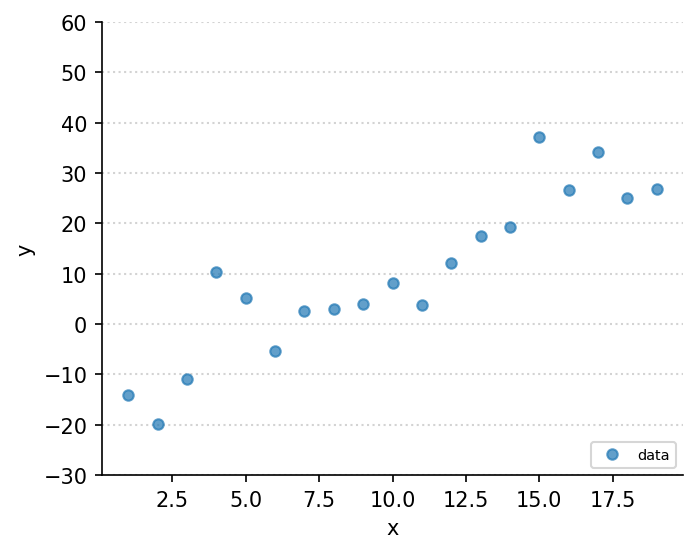

In [3]:
plt.figure()
plt.plot(x,y,'o', alpha=0.7, markersize=5)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['data'], loc=4, fontsize='x-small')
plt.ylim([-30, 60])
plt.show()

Now we need to create the __design matrix__, which is the same as writing the GLM in matrix form:

In [4]:
mat = np.concatenate([np.ones_like(x), x], axis=1)

The first column is just a column of ones. The second is the regressor of interest `x`. With this, the matrix form of our simple GLM can be written:

> `y = mat@beta`
  
Where beta is a 2x1 vector of regression coefficients, and `@` is the matrix multiplication. In this case, the first element of `beta` corresponds to the first column of the design matrix, and thus is the intercept. The second coefficient is the slope.

Fitting the GLM means finding `beta`. We do this in Numpy using the pseudo-inverse function:

In [5]:
beta = np.linalg.pinv(mat)@y
print('intercept = %f'%beta[0])
print('slope     = %f'%beta[1])

intercept = -15.883038
slope     = 2.564385


Compare the values in beta to those used in the simulation above (intercept and slope). Why are they different? [_Answer_ (Q1)](#Q1)

<a id='Q1_t'></a>
Let's now plot the model against the data:

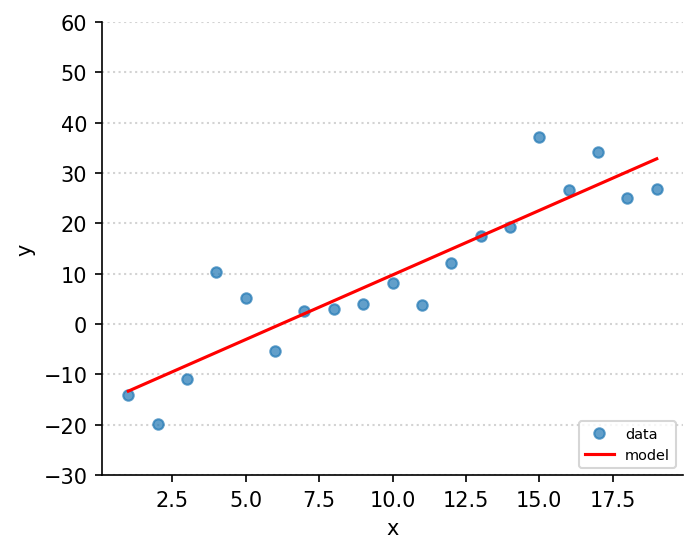

In [6]:
plt.plot(x,y,'o', alpha=0.7, markersize=5);
plt.plot(x,mat@beta,'r-');
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['data', 'model'], loc=4, fontsize='x-small')
plt.ylim([-30, 60])
plt.show()

---
## De-meaning

Let's compare fitting a linear model with and without the intercept. First, set up two design matrices:

In [7]:
M1 = x                                            # w/o intercept
M2 = np.concatenate([np.ones_like(x),x],axis=1)   # w/ intercept

Look at `M1` and `M2` if you are not sure what they should look like

Now solve the two GLMs:

In [8]:
beta1 = np.linalg.pinv(M1) @ y
beta2 = np.linalg.pinv(M2) @ y
print('beta1 = ')
print(beta1)
print('\nbeta2 = ')
print(beta2)

beta1 = 
[[1.34261245]]

beta2 = 
[[-15.88303795]
 [  2.5643846 ]]


Look at the values in `beta1` and `beta2`. How should we interpret the meaning of these values? [_Answer_ (Q2)](#Q2)

<a id='Q2_t'></a>
Plot the two models against the data:

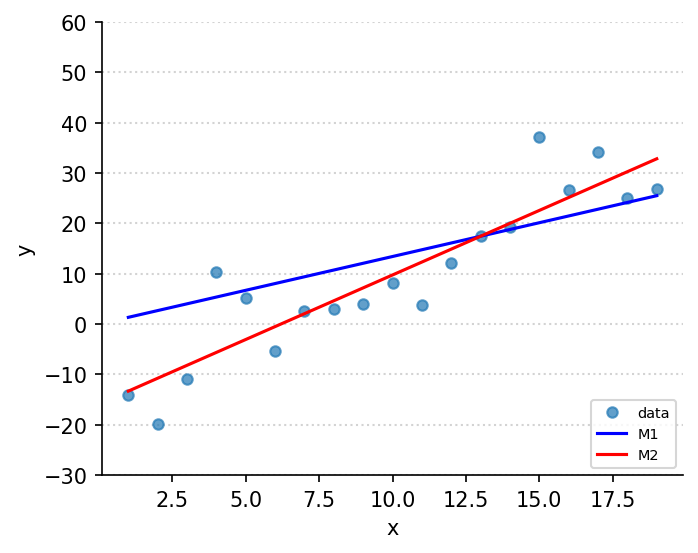

In [9]:
plt.figure()
plt.plot(x,y,'o', alpha=0.7, markersize=5)
plt.plot(x, M1 @ beta1, 'b-')
plt.plot(x, M2 @ beta2, 'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['data', 'M1', 'M2'], loc=4, fontsize='x-small')
plt.ylim([-30, 60])
plt.show()

Note how the red line must go through the origin `(0,0)`, as there is no intercept in the model (the intercept is always zero).

Note also how in this case the slope is higher when modelling the intercept. If we were to do statistics on this slope coefficient (to determine if it were significantly different from zero), would we find it more or less significant than if we hadn't modelled the intercept? [_Answer_ (Q3)](#Q3)

<a id='Q3_t'></a>

Compare fitting the same `M2` model (i.e. with a column of one's as a regressor), with and without demeaning `x`. What happens to the beta coefficients? How do we interpret the values in `beta2` after demeaning `x`? [_Answer_ (Q4)](#Q4)

<a id='Q4_t'></a>


---
## Residuals
The last thing we will do with this simple model is to look at the residuals.

The residuals are simply the data minus the model prediction:

In [10]:
pred = mat@beta
res = y - pred

Let's plot the residuals:

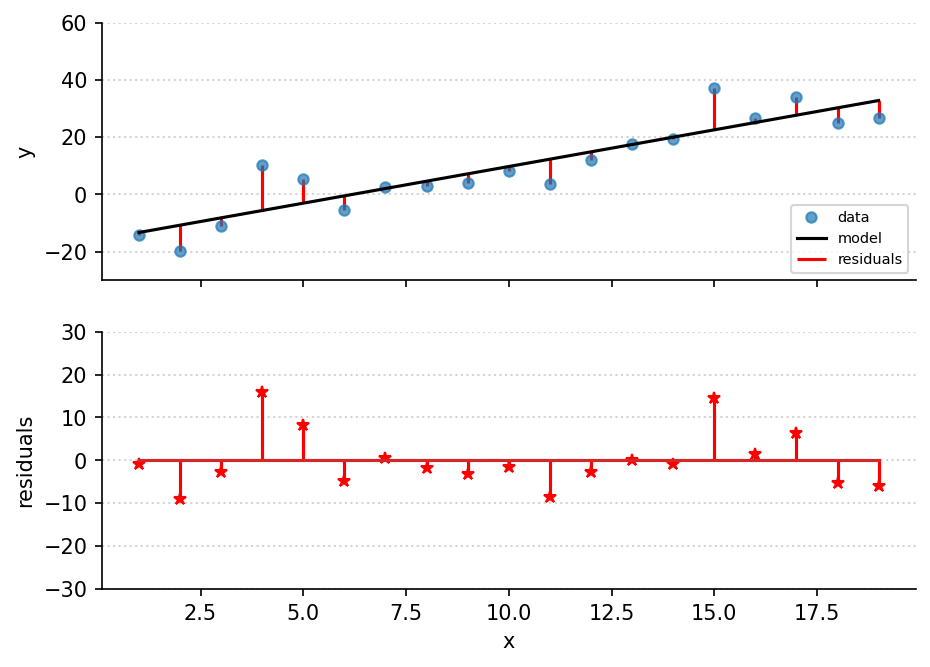

In [11]:
f, axs = plt.subplots(2,1, figsize=(7,5), sharex=True)
axs[0].plot(x,y,'o', alpha=0.7, markersize=5)
axs[0].plot(x,mat@beta,'k-')
axs[0].vlines(x,y,y-res, 'r')
axs[0].set_ylim([-30, 60])
axs[0].set_ylabel('y')
axs[0].legend(['data', 'model', 'residuals'], loc=4, fontsize='x-small')
axs[1].stem(x, res, 'r', markerfmt='r*', use_line_collection=True)
axs[1].set_ylim([-30, 30])
plt.xlabel('x')
axs[1].set_ylabel('residuals')
plt.show()

When we solve the GLM with the pseudo-inverse, the result minimises the sum of squared residuals.

It is sometimes useful to look at a plot of the residuals. What one looks for then is deviations from 'random noise', as this is what the residuals would look like if the model was right but the data noisy.

For example, let us imagine that the data is actually a quadratic function of x but we fit a linear model:

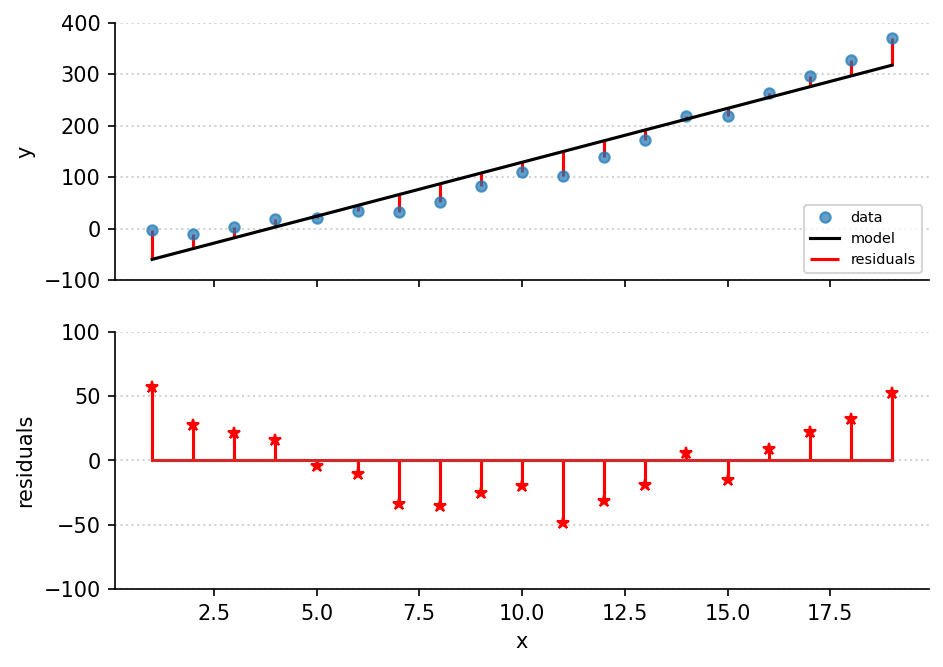

In [12]:
x  = np.arange(1,20).reshape(-1,1)   
y  = x**2
y  = y+10*np.random.randn(len(y),1)

mat = np.concatenate([np.ones_like(x),x],axis=1)
beta = np.linalg.pinv(mat)@y
res = y-mat@beta

f, axs = plt.subplots(2,1, figsize=(7,5), sharex=True)
axs[0].plot(x,y,'o', alpha=0.7, markersize=5)
axs[0].plot(x,mat@beta,'k-')
axs[0].vlines(x,y,y-res, 'r')
axs[0].set_ylim([-100, 400])
axs[0].set_ylabel('y')
axs[0].legend(['data', 'model', 'residuals'], loc=4, fontsize='x-small')
axs[1].stem(x, res, 'r', markerfmt='r*', use_line_collection=True)
axs[1].set_ylim([-100, 100])
plt.xlabel('x')
axs[1].set_ylabel('residuals')
plt.show()

It is clear that the residuals plot shows a lot of structure which is an indication that the model is bad.

---
## Stats on the betas

Doing statistics on the beta coefficients means for example evaluating how likely it is that a coefficient is different from zero, or how likely two coefficients are different from each other.

In order to do statistics, we therefore need not only to know the best value of beta, but also the uncertainty on the beta estimates.

How do we calculate the variance, and how do we interpret it?

We know already how to calculate the beta (with the pseudo-inverse). The variance of the beta (the uncertainty) depends on two things: the noise, and the design matrix.

Here, we will use a simplified situation where both the dependent and independent variables are demeaned, which means we do not need a column of ones in our design matrix:

In [13]:
x           = np.arange(1,20).reshape(-1,1)
x           = x-np.mean(x)
slope       = 2.5
y           = slope*x
y           = y + 10*np.random.randn(len(y),1) # add some noise

beta        = np.linalg.pinv(x)@y

If we assume that the noise is Gaussian with zero mean, then the mathematical formula for the variance is given by this expression:

>    `variance(beta) = [sum_squared_residuals / variance(x)] / [(N-rank(design))*N]`

In the above, `N` is the number of data points and design is the design matrix (`x`). The first term between brackets is a _noise_ term (normalised to the variance of the model). The second term between square brackets is to do with the design of the model.

Sometimes the term `N-rank(design)` is called __degrees of freedom__, or dof.

Ok let's calculate the variance with that formula (note: the formular is a little bit more complicated for design matrices that have more regressors, but the interpretation of the two terms is the same).

In [14]:
dof       = len(y)-np.linalg.matrix_rank(x)   # degrees of freedom
sse       = sum( (y-x@beta)**2 )              # sum squared residuals
var_beta  = (sse/np.var(x))/(dof*len(y))      # variance of beta

Now we are going to compare this value to an empirical version, where we simulate a bunch of datasets with different noise realisations. We do this with a _for_ loop:



In [15]:
Betas = np.zeros(1000)
for i in range(1000):
    y = slope*x
    y = y + 10*np.random.randn(len(y),1)
    Betas[i] = np.linalg.pinv(x)@y

Now compare the standard deviation of the vector of Betas with the theoretical standard deviation:

In [16]:
print(np.sqrt(var_beta))
print(np.std(Betas))

[0.44583315]
0.40999312905570695


They are pretty close. Isn't it nice when the maths work out? In practice of course, we only have one data set, so we have to make some assumptions about the noise, and we need to have a good design, in order to get a good estimate of the betas and their uncertainty.

---
# Nonlinear regression

The GLM is not just useful for fitting linear models. We can also use the same mechanisms to fit nonlinear models.

We will examine three such nonlinear models: polynomial, exponential, and sinusoidal.

Instead of generating boring old simulated data, we will instead have some fun with some real data: The Oxford weather data _(The data file should be already in your working directory, but if not download it from [here](http://www.fmrib.ox.ac.uk/~saad/ONBI/OxfordWeather.txt))_.

Now load the text file in Python's pandas module (we also create an additional variable called `meanTemp`):

In [17]:
names = ['year', 'month', 'maxTemp', 'minTemp', 'hoursFrost', 'rain', 'hoursSun']
df    = pd.read_csv('OxfordWeather.txt',
                     delim_whitespace=True, header=None, names=names)

meanTemp   = 0.5*(df.minTemp+df.maxTemp)

Plot some of the data to familiarise yourself with it:

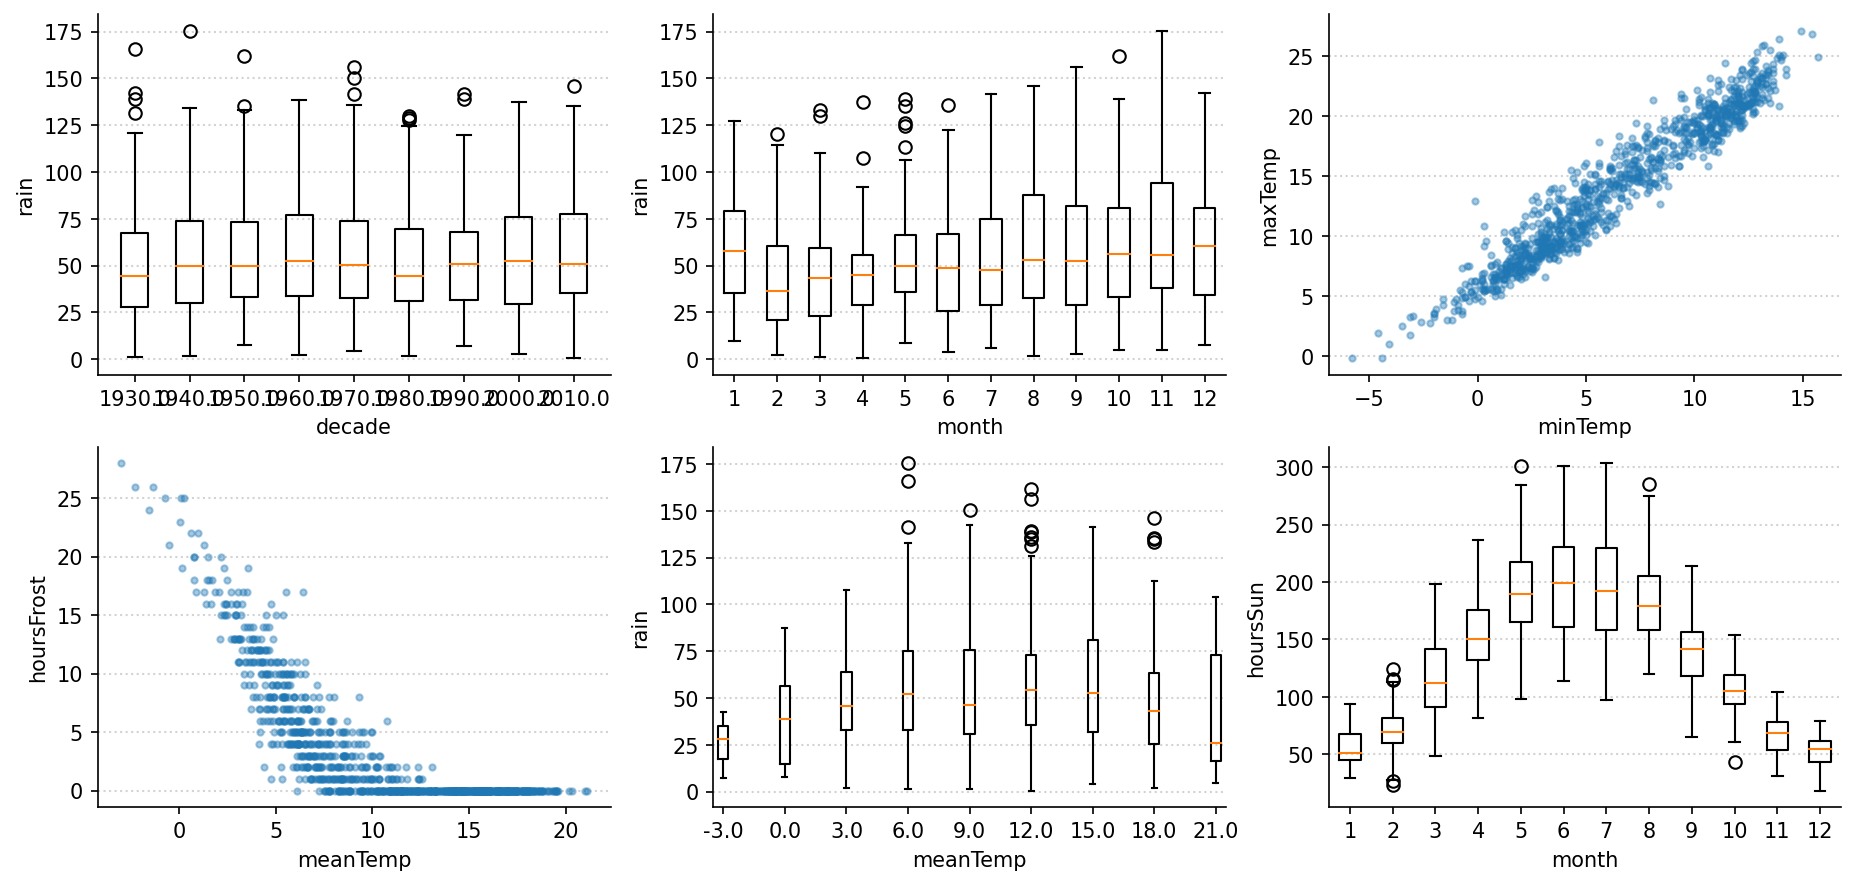

In [18]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(15,7))
decades = (np.round(df.year/10)*10)
ax1.boxplot([df.rain[decades == i] for i in decades.unique()],
        positions=decades.unique(),
        widths=5)
ax1.set_xlabel('decade')
ax1.set_ylabel('rain')

ax2.boxplot([df.rain[df.month==i] for i in df.month.unique()],
        positions=df.month.unique())
ax2.set_xlabel('month')
ax2.set_ylabel('rain')

ax3.plot(df.minTemp, df.maxTemp, 'o', alpha=0.4, markersize=3)
ax3.set_xlabel('minTemp')
ax3.set_ylabel('maxTemp')

ax4.plot(meanTemp, df.hoursFrost,'o', alpha=0.4, markersize=3)
ax4.set_xlabel('meanTemp')
ax4.set_ylabel('hoursFrost')

temps = np.round(meanTemp/3)*3
ax5.boxplot([df.rain[temps==i] for i in temps.unique()],
    positions=temps.unique())
ax5.set_xlabel('meanTemp')
ax5.set_ylabel('rain')

ax6.boxplot([df.hoursSun[df.month==i] for i in df.month.unique()],
    positions=df.month.unique())
ax6.set_xlabel('month')
ax6.set_ylabel('hoursSun')

plt.show()

You may notice from these plots that there is nothing much to model about the rain (at least with a GLM). It simply rains all the time... Instead, let's model the rest of the data in various ways.

---
## Polynomial model

Let's start by fitting a quadratic model of the form y=a*x^2+b*x+c with x=month and y=hoursSun.

A quadratic model is simply a linear model with x and x^2 as regressors (on top of the intercept).

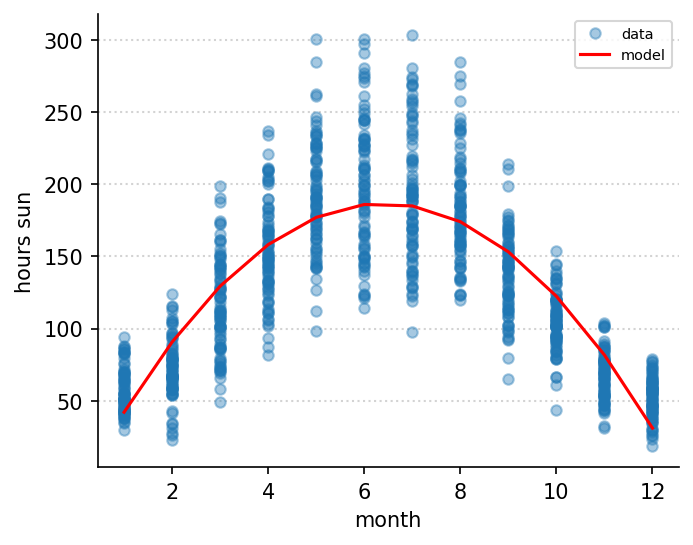

In [19]:
x = df.month.values.reshape(-1,1)
y = df.hoursSun.values.reshape(-1,1)

i = np.argsort(x,axis=0).reshape(-1)  # we have to sort the data according to x if we want a nice plot
x = x[i]
y = y[i]

M = np.concatenate([np.ones_like(x), x, x**2], axis=1)  # this is the cunning bit
beta = np.linalg.pinv(M) @ y
plt.plot(x, y, 'o', alpha=0.4, markersize=5)
plt.plot(x, M @ beta, 'r')
plt.xlabel('month')
plt.ylabel('hours sun')
plt.legend(['data', 'model'], loc=1, fontsize='x-small')
plt.show()

Higher order polynomial models can also be fitted of course. Just add higher powers of `x`. Let's do higher order polynomials.

Let us write a generic function that can fit a polynomial of user-defined order (i.e. `y=a+b*x+c*x^2+d*x^3+...`) and fit this model to the hoursFrost data using meanTemp as a regressor. We will also ask what polynomial order gives the best fit without over-fitting.

In [20]:
def fit_poly(x,y,p):
    """
    [beta,pred,err,sse]=fit_poly(x,y,p)

    p is the degree of the polynomial
    """

    M = np.ones_like(x)
    for i in range(1,p):
        xx = x**i
        xx = xx - np.mean(xx)
        xx = xx / np.linalg.norm(xx)
        M  = np.concatenate([M, xx], axis=1)

    beta = np.linalg.pinv(M) @ y   # regression coefficient

    pred = M @ beta       # data predicted by the model
    err  = y-M @ beta     # error
    sse  = np.sum(err**2) # sum of squared error
    return [beta,pred,err,sse]

Now let's use the above function on meanTemp/hoursFrost data:

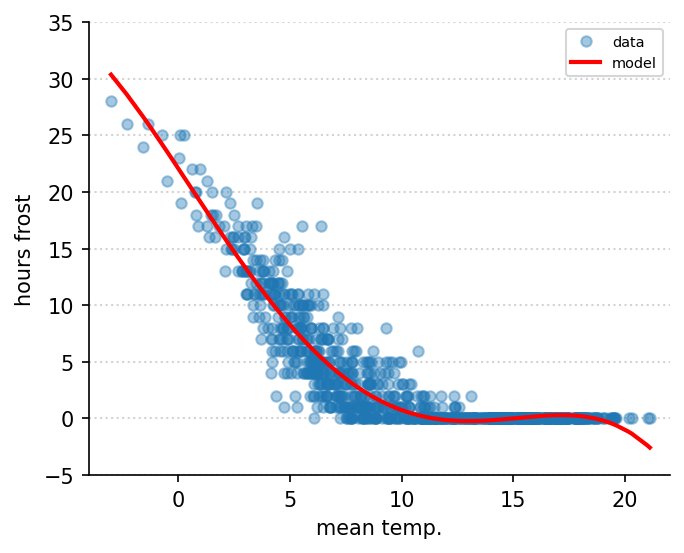

In [21]:
x = meanTemp.values.reshape(-1,1)
y = df.hoursFrost.values.reshape(-1,1)

i = np.argsort(x, axis=0).reshape(-1)
x = x[i]
y = y[i]

plt.plot(x, y, 'o', alpha=0.4, markersize=5)
plt.xlabel('mean temp.')
plt.ylabel('hours frost')

[beta, pred, err, sse] = fit_poly(x, y, 5)
plt.plot(x, pred, 'r', lw=2)
plt.legend(['data', 'model'], loc=1, fontsize='x-small')
plt.ylim([-5, 35])
plt.xlim([-4, 22])
plt.show()

Qualitatively, a polynomial of order 5 seems to give a good fit without over-fitting. Techniques for formally testing model order are out of scope here, but we can mention cross-validation as an example.

There are many ways of doing cross-validation, the simplest being to exclude one or a few data-points, fit the model, and test the error on the left-out data points. Repeat the process for different left-out data, and look at the average error. This method gives very good results in terms of "predictive" power, i.e. how good a model is at predicting unseen data.

---
## Exponential model

Let us now fit an exponential model with `x=min temperature` and `y=hoursFrost`.

We start by log-transforming the data and notice that you end up with a simple GLM. That is because if `y=a*exp(b*x)`, then `log(y)=log(a)+b*x`. Which is a linear model where `log(y)` depends linearly on `x`.

/usr/local/fsl/fslpython/envs/fslpython/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


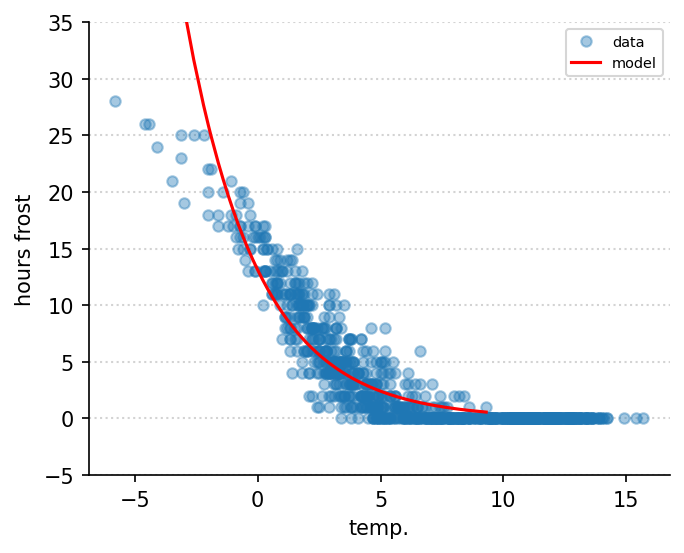

In [22]:
x = df.minTemp.values.reshape(-1,1)
y = np.log(df.hoursFrost.values.reshape(-1,1)) # trick: in order to fit exp with GLM, use log transform!

# unfortunately, this trick only works for hoursFrost>0. So we need to
# exclude data points where hoursFrost=0:
x = x[df.hoursFrost > 0]
y = y[df.hoursFrost > 0]

i = np.argsort(x, axis=0).reshape(-1) # again, easier to plot if we sort x and y
x = x[i]
y = y[i]

M = np.concatenate([np.ones_like(x), x], axis=1)
beta = np.linalg.pinv(M) @ y

plt.plot(df.minTemp, df.hoursFrost, 'o', alpha=0.4, markersize=5)
plt.plot(x, np.exp(M @ beta), 'r')
plt.legend(['data', 'model'], loc=1, fontsize='x-small')
plt.ylim([-5, 35])
plt.xlabel('temp.')
plt.ylabel('hours frost')
plt.show()


For this data the exponential model isn't quite right, we only did this so we can learn how to fit an exponential model with the GLM.

Note that when applying a transform to the data, there are two issues: [1] the transform is not always defined, and [2] the sum of squared error is minimised in the transformed domain, so may not be optimal for the actual data. The fitted parameters using the GLM can still be used to initialise a nonlinear fitting procedure.

---
## Sinusoidal model

Imagine you have some periodic data that you want to fit. You know what the period is, and you are interested to fit the amplitude and the phase of the data. For example, you have measured temperature fluctuations over the years, and you want to model these fluctuations as a function of months, so you know that the period is 1 year), but you don't know the amplitude (max temperature) or the phase.

For this example we will use the mean temperature, as it has an oscillatory behaviour.

First we need to do some maths. Let's write the model (sorry about the matlab notations, they are better for writing maths):

> `mean_tempetature = A*cos(2*pi*t/12+phi)`

In this model, `t` is the time in months, `A` is the amplitude, and `phi` is the phase. We divide t by 12 and multiply by `2*pi` because every 12 months, we get back to where we started (full period), which is `cos(2*pi)=cos(0)=1`.

The unknowns in this model are the amplitude (`A`) and the phase (`phi`)

Now this looks like a nonlinear model, but we can turn it into a linear model using this trigonometric formula:

>  `cos(x+y) = cos(x)cos(y)-sin(x)sin(y)`

If we apply this to our model, replacing `x+y` with `2*pi*t/12+phi`, we get:

>   `cos(2*pi*t/12+phi) = cos(2*pi*t/12*cos(phi)-sin(2*pi*t/12)*sin(phi)`

With this, we can now write our model:

>   `mean_tempetature = A*cos(2*pi*t/12)*cos(phi)-A*sin(2*pi*t/12)*sin(phi)`

If we make a small change of variables:

>    `b1 = A*cos(phi)`
>    `b2 = A*sin(phi)`

We end up with a linear model!

>   `mean_temperature = cos(2*pi*t)*b1 - sin(2*pi*t)*b2`

Let's create our design matrix and fit the model.

In [23]:
t    = np.arange(0,len(df.month)).reshape(-1,1)                                       
mat  = np.concatenate([np.cos(2*np.pi*t/12),-np.sin(2*np.pi*t/12)],axis=1) 
beta = np.linalg.pinv(mat)@meanTemp.values.reshape(-1,1)

That's it! Let's look at the model fit.

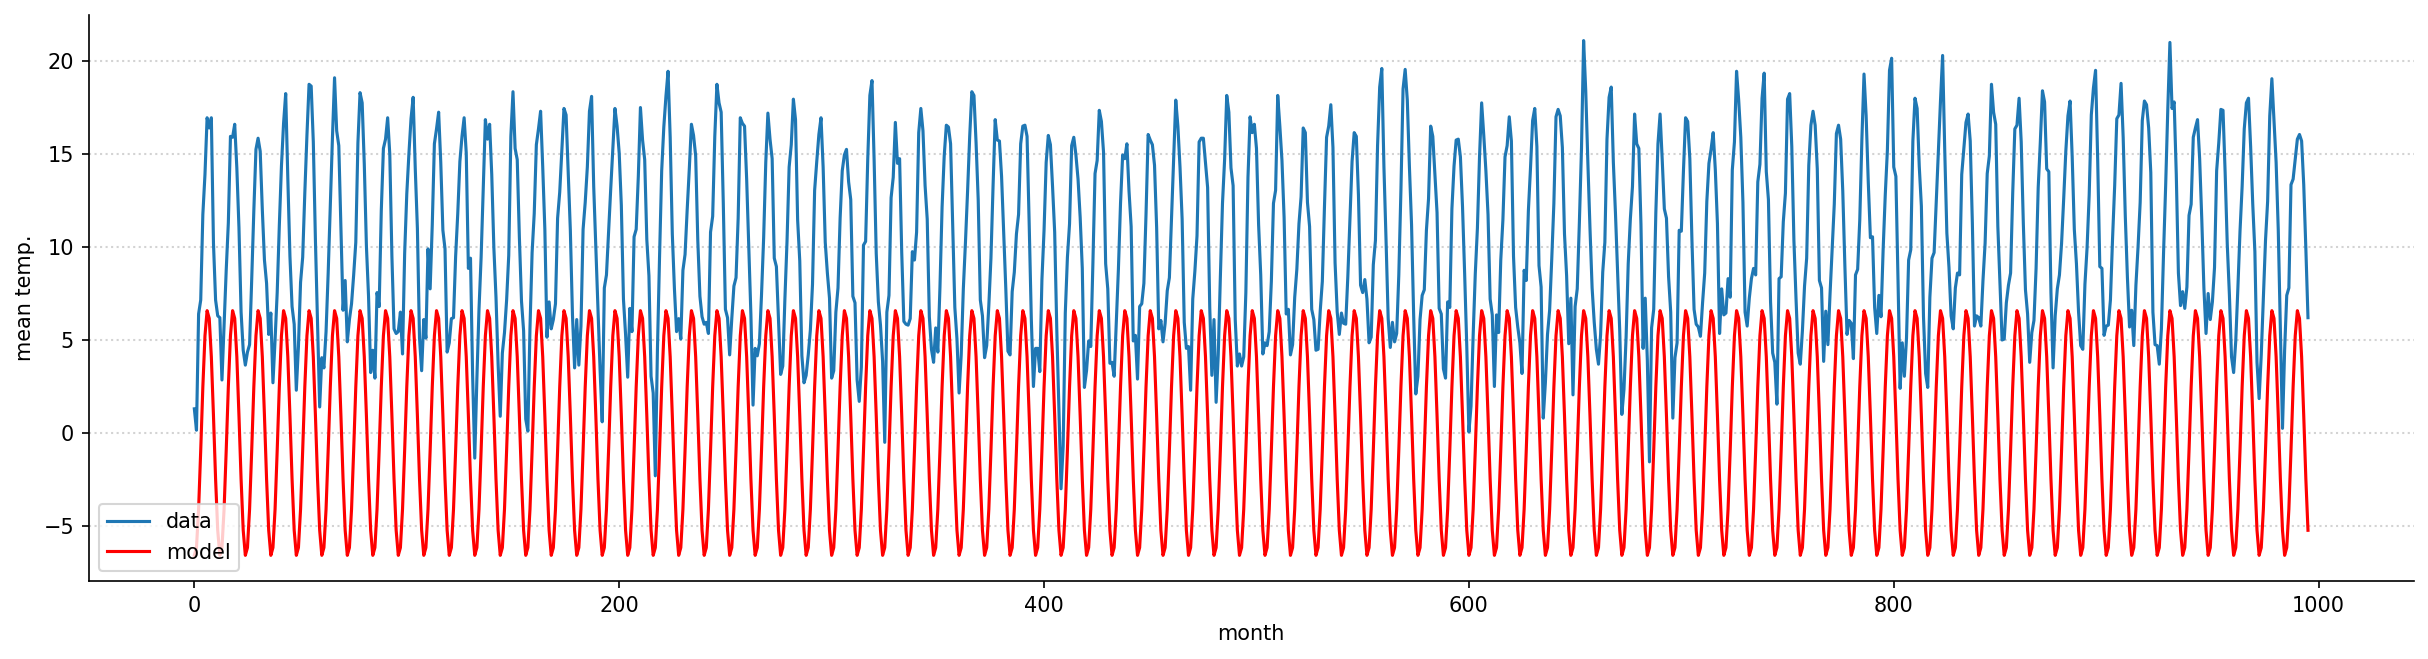

In [24]:
plt.figure(figsize=(20,5))
plt.plot(t,meanTemp)
plt.plot(t,mat@beta,'r-')
plt.xlabel('month')
plt.ylabel('mean temp.')
plt.legend(['data', 'model'], loc=3)
plt.show()

Oh dear, I forgot the mean! Let's add that to the design matrix:

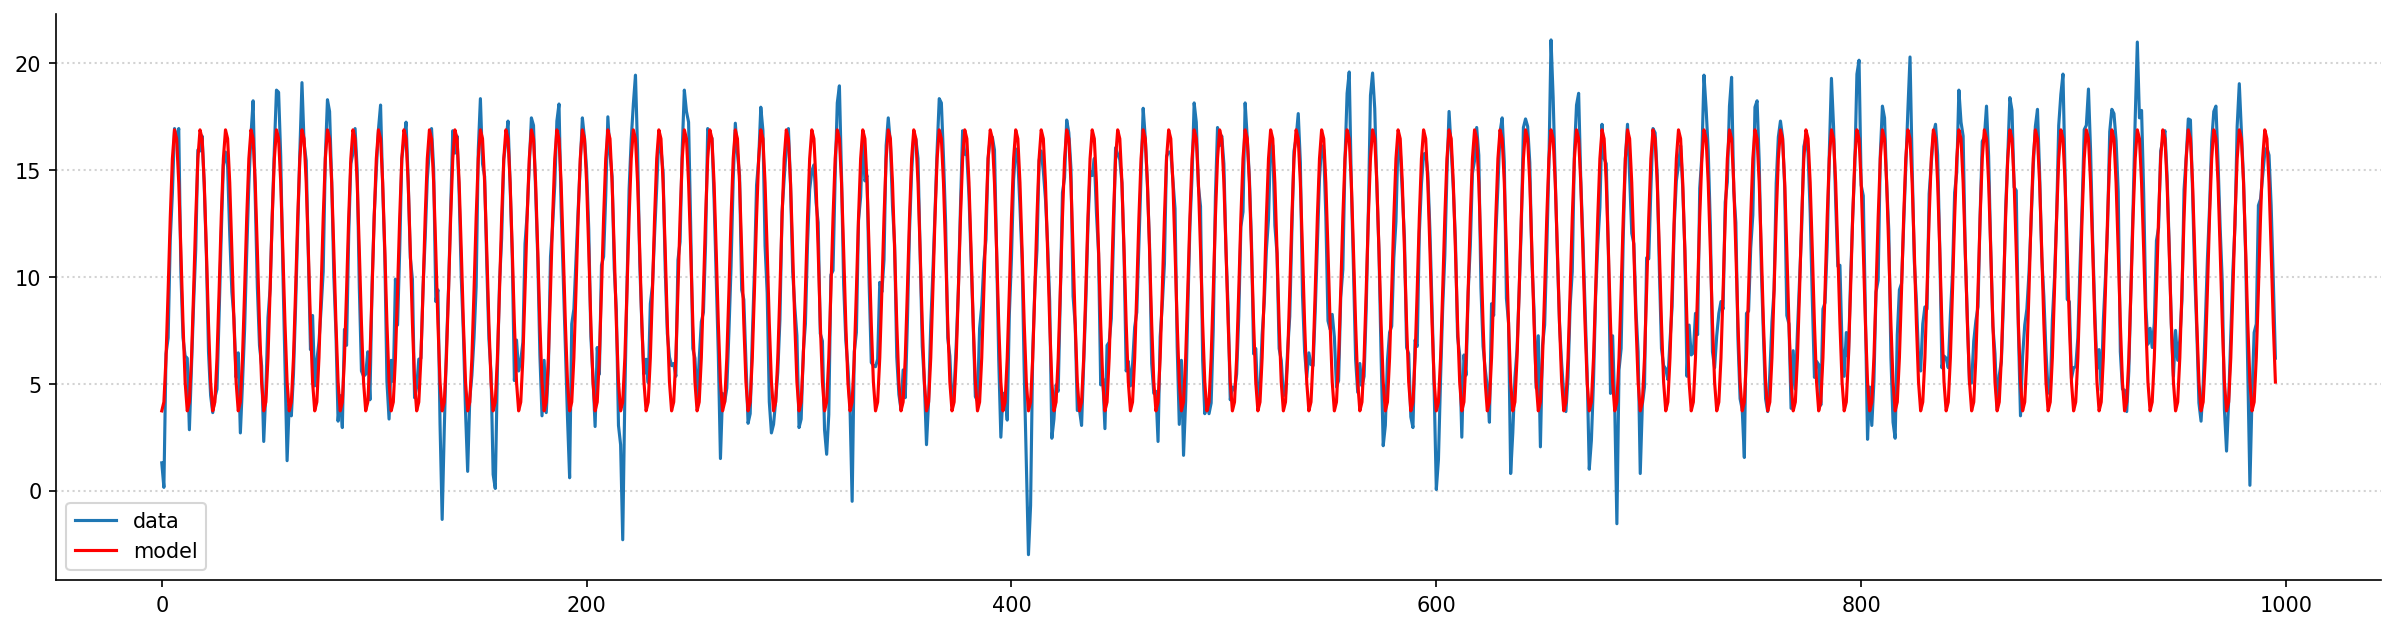

In [25]:
mat  = np.concatenate([np.ones_like(t),mat],axis=1)
beta = np.linalg.pinv(mat)@meanTemp.values.reshape(-1,1)

plt.figure(figsize=(20,5))
plt.plot(t,meanTemp)
plt.plot(t,mat@beta,'r-')
plt.legend(['data', 'model'], loc=3)
plt.show()

That's pretty good. Now the betas have a nice interpretation:

`beta[0]` is the mean temperature over the years, since we have added a column of ones to the design matrix.

What do `beta[1]` and `beta[2]` mean?

Recall that in our model we have made a change of variables (look above).

If you recall your sine and cosine laws, we have:


>   `beta[1]^2+beta[2]^2 = A^2`

So that means `A=np.sqrt(beta[1]**2+beta[2]**2)`. This is the amplitude. If you run this in Python you find `A=6` degrees Celcius, which is the amplitude change across the year (i.e. 12 degrees between lowest and highest temprature).

For the phase `phi`, we have `cos(phi)=beta[1]` and `sin(phi)=beta[2]`. This means that `tan(phi)=beta[2]/beta[1]`. So we can use the inverse tangent to get the phase. However, dividing `beta[2]` by `beta[1]` means that we loose the sign information (negative divided by negative is the same as positive divided by positive). So instead, we use the `arctan2` function which preserve the sign information:

In [26]:
phi = np.arctan2(beta[2],beta[1])
print(phi)

[3.00066404]


you'll find `phi~3`. How should we interpret this value?

Well, remember that the model is `meanTemp=A*cos(2*pi*t+phi)`. So the time for which the mean temperature is maximal corresponds to `2*pi*t/12+phi=2*pi*k` (where `k` is any integer).

Therefore, `t = 12*k-12*phi/2/pi` (replace `k` by integers and you'll get `t` in months).

You may wonder if we can fit this model but also find the frequency, not just the amplitude and phase. This is possible of course, but it is no longer a linear model unfortunately...

___
---
# Answers

<a id='Q1'></a>
[Q1] Because we have added noise. If you try to fit the same model to noiseless data you will get the slope and intercept that you have used to simulate the data. [_return_](#Q1_t)

<a id='Q1'></a>
[Q1] Because we have added noise. If you try to fit the same model to noiseless data you will get the slope and intercept that you have used to simulate the data. [_return_](#Q1_t)

<a id='Q2'></a>
[Q2] In the above, `beta1` contains the estimate of the slope, whereas `beta2` contains estimates for the slope and the intercept (make sure you know which is the slope and which is the intercept - check against the design matrices). [_return_](#Q2_t)

<a id='Q3'></a>
[Q3] It can go either way. If the intercept was positive, `beta1` would have been higher, but model fit poorer, which affects the variance on the estimate of `beta1`. [_return_](#Q3_t)

<a id='Q4'></a>
[Q4] Let's first fit the demeaned model and display the regression coefficients (the betas):

In [27]:
M3    = np.concatenate([np.ones_like(x), x-np.mean(x)], axis=1)
beta3 = np.linalg.pinv(M3) @ y
print('beta3 = ')
print(beta3)

beta3 = 
[[ 1.60122524]
 [-0.33893463]]


Notice that `beta2[0]` was the intercept, but here `beta3[0]` is the mean of the data `y`. The column of one's in the design matrix models the intercept only if `x` is not demeaned, but it models the mean if `x` is demeaned. Notice also that the estimate of the slope does not change between the two models, despite changing the corresponding regressor! [_return_](#Q4_t)